In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [0]:
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [0]:
train_rand_idxs = np.random.choice(50000, 700) # 총 개수, 샘플링 개수
# 실제 데이터의 인덱스 번호를 반환해줌(choice))
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [0]:
Y_train = np_utils.to_categorical(Y_train) # 각각의 데이터를 카테고리화 시켜줌
Y_val = np_utils.to_categorical(Y_val) 
Y_test = np_utils.to_categorical(Y_test)

In [6]:
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 700 samples, validate on 300 samples
Epoch 1/1000





700/700 [==============================] - 0s 363us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 148us/step - loss: 2.2071 - acc: 0.1671 - val_loss: 2.1907 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 158us/step - loss: 2.1728 - acc: 0.1729 - val_loss: 2.1629 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 145us/step - loss: 2.1439 - acc: 0.1786 - val_loss: 2.1369 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 163us/step - loss: 2.1173 - acc: 0.1900 - val_loss: 2.1139 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 147us/step - loss: 2.0937 - acc: 0.2029 - val_loss: 2.0925 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============

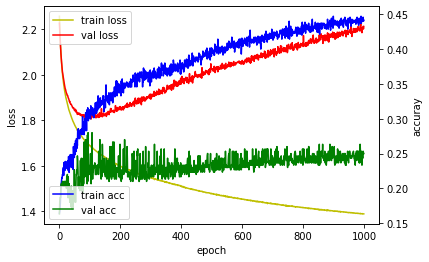

In [10]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()